In [4]:
import numpy as np
from scipy.stats import norm
import math
import matplotlib.pyplot as plt
from numpy.random import *
import pandas as pd


In [5]:
# csv取り込み
df = pd.read_csv("./tallWeight.csv", skiprows=1, names=('tall', 'weight'))
print(df)

     tall  weight
0    78.8    10.4
1    89.1    12.8
2    95.3    14.2
3   103.2    16.5
4   109.5    18.5
5   115.9    20.4
6   121.1    23.4
7   127.3    26.2
8   133.1    29.8
9   137.5    32.9
10  145.0    37.1
11  149.9    42.2
12  158.8    45.8
13  164.1    51.9
14  169.2    57.2


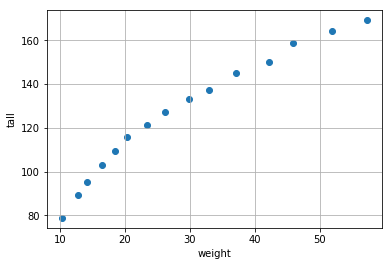

In [6]:
#身長と体重のグラフ
plt.scatter(df.weight, df.tall)
plt.xlabel('weight')
plt.ylabel('tall')
plt.grid(True)

In [11]:
print(range(2))

range(0, 2)


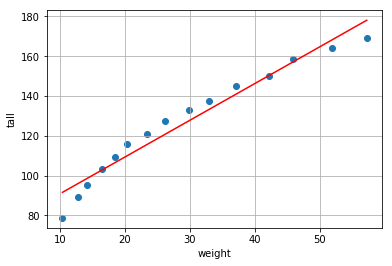

In [15]:
#Xを作成
dfWeight = df.weight
X = np.ones((dfWeight.size, 2))
for i in range(dfWeight.size):
    X[i, 1] = dfWeight[i]

#tを作成
t = df.tall

#wを求める
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), t)

#直線の式
Y = np.zeros((2, dfWeight.size))
for i in range(dfWeight.size):
    Y[0, i] = dfWeight[i]
    for j in range(2):
        if j == 0:
            Y[1, i] = w[0]
        else:
            Y[1, i] = Y[1, i] + w[j]*(dfWeight[i]**j)
    
#図示
plt.scatter(df.weight, df.tall)
plt.plot(Y[0], Y[1], c='red')
plt.xlabel('weight')
plt.ylabel('tall')
plt.grid(True)


In [17]:
#16人目が40.7kgのとき、身長は？
weight = 40.7
tall = 0
for j in range(2):
        if j == 0:
            tall = w[0]
        else:
            tall = tall + w[j]*(weight**j)
print(tall)

147.60120273695122


[[1.00000000e+00 1.04000000e+01 1.08160000e+02 1.12486400e+03]
 [1.00000000e+00 1.28000000e+01 1.63840000e+02 2.09715200e+03]
 [1.00000000e+00 1.42000000e+01 2.01640000e+02 2.86328800e+03]
 [1.00000000e+00 1.65000000e+01 2.72250000e+02 4.49212500e+03]
 [1.00000000e+00 1.85000000e+01 3.42250000e+02 6.33162500e+03]
 [1.00000000e+00 2.04000000e+01 4.16160000e+02 8.48966400e+03]
 [1.00000000e+00 2.34000000e+01 5.47560000e+02 1.28129040e+04]
 [1.00000000e+00 2.62000000e+01 6.86440000e+02 1.79847280e+04]
 [1.00000000e+00 2.98000000e+01 8.88040000e+02 2.64635920e+04]
 [1.00000000e+00 3.29000000e+01 1.08241000e+03 3.56112890e+04]
 [1.00000000e+00 3.71000000e+01 1.37641000e+03 5.10648110e+04]
 [1.00000000e+00 4.22000000e+01 1.78084000e+03 7.51514480e+04]
 [1.00000000e+00 4.58000000e+01 2.09764000e+03 9.60719120e+04]
 [1.00000000e+00 5.19000000e+01 2.69361000e+03 1.39798359e+05]
 [1.00000000e+00 5.72000000e+01 3.27184000e+03 1.87149248e+05]]


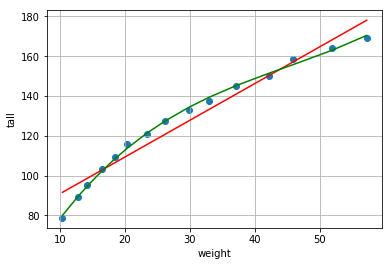

In [20]:
#Xを作成
dfWeight = df.weight
m = 3
X = np.ones((dfWeight.size, m + 1))

for i in range(dfWeight.size):
    for j in range(m):
        X[i, j + 1] = dfWeight[i] ** (j + 1)

print(X)

#tを作成
t = df.tall

#wを求める
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), t)

#直線の式
Z = np.zeros((2, dfWeight.size))
for i in range(dfWeight.size):
    Z[0, i] = dfWeight[i]
    for j in range(m+1):
        if j == 0:
            Z[1, i] = w[0]
        else:
            Z[1, i] = Z[1, i] + w[j]*(dfWeight[i]**j)

    

#図示
plt.scatter(df.weight, df.tall)
plt.plot(Y[0], Y[1], c='red')
plt.plot(Z[0], Z[1], c='green')
plt.xlabel('weight')
plt.ylabel('tall')
plt.grid(True)


In [19]:
#16人目が35.6kgのとき、身長は？
weight = 35.6
tall = 0
for j in range(m+1):
        if j == 0:
            tall = w[0]
        else:
            tall = tall + w[j]*(weight**j)
print(tall)

143.20833796960784


       x         y
79  0.00 -0.246319
80  0.01 -0.067350
44  0.02  0.602363
69  0.03 -0.127639
91  0.04  0.034174
40  0.05 -0.066260
14  0.06  0.450742
94  0.07  0.601147
11  0.08  0.344912
31  0.09  0.434617
66  0.10  0.518852
10  0.11  0.730681
29  0.12  0.476397
1   0.13  1.052615
55  0.14  0.154739
93  0.16  0.388053
24  0.17  0.813079
42  0.18  1.133907
43  0.19  1.167182
83  0.20  1.050628
78  0.21  1.022316
6   0.22  1.199697
61  0.23  1.016374
64  0.24  0.870271
81  0.25  1.020031
20  0.26  1.240373
23  0.27  0.529793
9   0.28  1.052765
57  0.29  0.551779
58  0.30  0.554227
..   ...       ...
39  0.70 -0.967759
25  0.71 -0.847882
70  0.72 -0.875564
75  0.73 -1.207658
54  0.74 -1.275103
74  0.75 -1.259232
48  0.76 -0.664957
2   0.77 -0.711156
63  0.78 -1.084734
60  0.79 -0.405891
84  0.80 -0.425099
22  0.81 -1.244766
13  0.82 -1.218677
62  0.83 -0.894066
95  0.84 -0.804615
37  0.85 -0.927536
87  0.86 -1.032614
76  0.87 -1.166063
92  0.88 -0.813458
98  0.89 -0.904650
36  0.90 -0.

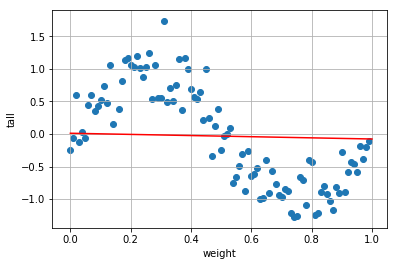

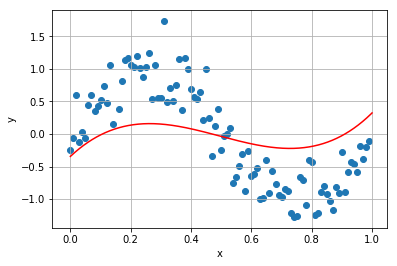

In [14]:
##多項式回帰
#Xを作成
#m = 3とする ただしm>1
m = 3
X = np.ones((df.x.size, m + 1))

for i in range(df.x.size):
    for j in range(m):
        X[i, j + 1] = df.x[i] ** (j + 1)
#print(X)


#tを作成
t = df.y
#print(t)

#wを求める
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), t)
#print(w)

#直線の式
linex = np.linspace(0, 1, 10000)
f = lambda x:w[0] + w[1]*x + w[2]*(x ** 2) + w[3]*(x ** 3)
                                                                                                                                                     
'''
f = lambda x:w[0]
for i in range(m):
    f = lambda x:f(x) + w[i+1]*(x**(i+1))
'''
liney = f(linex)


#図示
plt.scatter(df.x, df.y)
plt.plot(linex, liney, c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

In [17]:
linex = np.linspace(10, 60, 10)
print(linex)

[10.         15.55555556 21.11111111 26.66666667 32.22222222 37.77777778
 43.33333333 48.88888889 54.44444444 60.        ]
